In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l


In [2]:
def synthetic_data(w, b, num_examples):
    """
    y= Xw + b + noise
    """
    # 生成一个01正态分布随机 大小num_examples,len(w)的张量
    X=torch.normal(0, 1, (num_examples, len(w)))
    y=torch.matmul(X, w) + b
    y+=torch.normal(0, 0.01, y.shape)
    # y返回的是列向量
    return X,y.reshape((-1, 1))


In [3]:
ture_w=torch.tensor([2,-3.4])
true_b=4.2

features,labels = synthetic_data(ture_w, true_b, 1000)

In [4]:
print("features:",features[0],"\nlabels:",labels[0])

features: tensor([ 0.1965, -0.1756]) 
labels: tensor([5.1927])


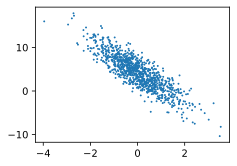

In [5]:
d2l.set_figsize()
# x第一列 
d2l.plt.scatter(features.data.numpy()[:, 1], labels.data.numpy(),1)

In [6]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 打乱顺序
    random.shuffle(indices)

    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size, num_examples)])

        # 迭代返回
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print("X:",X,"\ny:",y)
    break



X: tensor([[ 0.2759, -0.5572],
        [-1.3726, -2.2853],
        [-0.0213,  0.5328],
        [ 0.3899, -0.1399],
        [ 1.8444, -0.2654],
        [ 1.2199, -0.2324],
        [-0.8854, -0.3966],
        [ 0.6761, -0.0149],
        [ 0.6432,  0.7266],
        [ 0.5649, -0.3146]]) 
y: tensor([[6.6512],
        [9.2377],
        [2.3440],
        [5.4457],
        [8.7873],
        [7.4568],
        [3.7798],
        [5.6107],
        [2.9987],
        [6.3986]])


In [7]:

# 初始参数
w=torch.normal(0,0.01,size=(2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)

def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [8]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [9]:
def sgd(params, lr, batch_size):
    # 不进行梯度求导
    # 更新的时候梯度不要参与计算
    with torch.no_grad():
        for param in params:
            # 如果之后会通过backward()求得梯度，所以这里不用再调用.grad可以直接获得之前计算的梯度值
            param.data -= lr * param.grad / batch_size
            # 手动梯度设为0，如果没有计算的话grad就是None
            param.grad.zero_()

In [10]:
lr = 0.03
num_epochs = 3
net=linreg
loss=squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():

        ## tensor 的平均值还是tensor
        ## 要么强转，要么.item()
        train_l= loss(net(features, w, b), labels)
        print("epoch %d, loss %f" % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.036666
epoch 2, loss 0.000130
epoch 3, loss 0.000047


In [11]:
nn= torch.arange(0,10).reshape(2,5)
print(nn.sum().item())

tensor(45)
